In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

# 한글 깨짐 방지
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
df = pd.read_csv('./datasets/kosdaq.csv')
df = df[['Date','Adj Close']]
df.columns = ['일자', '수정주가지수']
df

,일자,수정주가지수
0,2009-10-01,502.549988
1,2009-10-05,497.829987
2,2009-10-06,494.420013
3,2009-10-07,491.369995
4,2009-10-08,496.959991
...,...,...
2523,2019-12-23,647.619995
2524,2019-12-24,638.909973
2525,2019-12-26,652.070007
2526,2019-12-27,661.239990


In [3]:
df1 = pd.read_csv('./datasets/1. 전처리완료.csv', index_col=0)
df1

,영화명,개봉일,국적,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,영화구분,개봉연도,...,대표코드,등급_12,등급_15,등급_전체,등급_청불,국내배급사,상장배급사,주요배급사,배우가중치,감독가중치
0,명량,2014-07-30,1,1587,135748398910,17613682,33121225810,4163666,1,2014,...,20129370,0,1,0,0,0,1,1,39.00,2.00
1,극한직업,2019-01-23,1,1978,139647979516,16264944,31858660536,3638287,1,2019,...,20182530,0,1,0,0,0,1,1,21.00,3.00
2,신과함께-죄와 벌,2017-12-20,1,1912,115698654137,14410754,27530825087,3346172,1,2017,...,20150976,1,0,0,0,0,1,1,27.00,3.00
3,국제시장,2014-12-17,1,966,110828014630,14245998,25842519330,3233946,1,2014,...,20137048,1,0,0,0,0,1,1,29.00,1.00
4,어벤져스: 엔드게임,2019-04-24,0,2835,122182694160,13934592,33577136860,3597963,1,2019,...,20184889,1,0,0,0,1,0,1,22.00,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,스파이 브릿지,2015-11-05,0,425,2015360478,260721,722246378,90018,1,2015,...,20152871,1,0,0,0,1,0,1,0.33,0.10
913,함정,2015-09-10,1,445,2088685200,257716,411417600,50477,1,2015,...,20143510,0,0,0,1,0,0,0,0.63,0.03
914,파이널 데스티네이션5,2011-09-08,0,168,2370348500,257193,880006000,87499,1,2011,...,20112050,0,0,0,1,1,0,1,0.03,0.07
915,언브로큰,2015-01-07,0,401,1997947292,256475,605776392,75489,1,2015,...,20149948,0,1,0,0,1,0,1,0.23,0.03


In [4]:
## 일자 시계열데이터로 변경, 수정주가지수, 12일 뒤 주가지수 컬럼 생성
df['일자'] = pd.to_datetime(df['일자'])
df['수정주가지수12'] = df['수정주가지수'].shift(11)
df.columns = ['개봉일', '수정주가지수', '수정주가지수12']
df1['개봉일'] = pd.to_datetime(df1['개봉일'])
df1 = df1.reset_index(drop='index')
df2 = pd.merge(df1, df, how='left', on='개봉일')
df2['수정주가지수'] = df2['수정주가지수'].interpolate()
df2['수정주가지수12'] = df2['수정주가지수12'].interpolate()

In [5]:
## 수익률 컬럼 생성
# 
#12일 수익률 컬럼 생성
df2['12일수익률'] = (df2['수정주가지수12'] - df2['수정주가지수']) / df2['수정주가지수']

# # 일일 수익률 컬럼 생성
# df1['일일수익률'] = (df1['12일수익률'] + 1) ** (1/12) - 1

# # 연간 수익률 컬럼 생성
# df1['연간수익률'] = ((1 + df1['일일수익률']) ** 252 - 1) * 100

In [6]:
movie = pd.read_csv('./datasets/영화업종지수.csv', index_col=0)
movie

,일자,수정주가지수
0,2019/12/30,284.909520
1,2019/12/27,281.475255
2,2019/12/26,277.548066
3,2019/12/24,275.803342
4,2019/12/23,279.196411
...,...,...
4931,2000/01/10,80.606965
4932,2000/01/07,80.101663
4933,2000/01/06,89.717078
4934,2000/01/05,91.902233


In [7]:
## 일자 시계열데이터로 변경, 수정주가지수, 12일 뒤 주가지수 컬럼 생성
movie['일자'] = pd.to_datetime(movie['일자'])
movie['영화지수12'] = movie['수정주가지수'].shift(11)
movie.columns = ['개봉일', '수정주가지수', '영화지수12']
df1 = df1.reset_index(drop='index')
df1 = pd.merge(df1, movie, how='left', on='개봉일')
df1['수정주가지수'] = df1['수정주가지수'].interpolate()
df1['영화지수12'] = df1['영화지수12'].interpolate()

In [8]:
# df1 = df1.reset_index(drop='index')
# df1 = pd.merge(df1, df, how='left', on='개봉일')
# df1['영화지수'] = df1['영화지수'].interpolate()
# df1['영화지수12'] = df1['영화지수12'].interpolate()

In [9]:
df1['영화12일수익률'] = (df1['영화지수12'] - df1['수정주가지수']) / df1['수정주가지수']

In [10]:
df2['영화12일수익률'] = df1['영화12일수익률']

In [11]:
# Y 레이블 제작

df2['Label'] = 0

for i in range(len(df2)):
    if df2['영화12일수익률'][i] > 0:
        df2['Label'][i] = 1

In [12]:
# 필요없는 컬럼 삭제
law_data = df2.drop(['수정주가지수', '수정주가지수12', '영화12일수익률', '12일수익률'], axis=1)

In [13]:
law_data['Label'].value_counts()

1    480
0    437
Name: Label, dtype: int64

전체 데이터 수 : 917
초과수익달성 데이터 수 : 480
초과수익미달 데이터 수 : 437


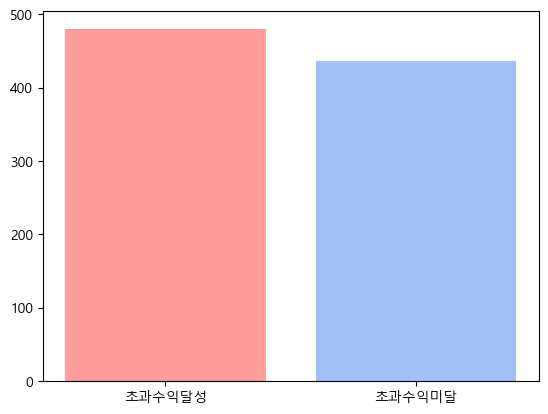

In [14]:
print("전체 데이터 수 :", law_data.shape[0])
print("초과수익달성 데이터 수 :", law_data[law_data["Label"]==1].shape[0])
print("초과수익미달 데이터 수 :", law_data[law_data["Label"]==0].shape[0])

# --------------
x = np.arange(2)
years = ['초과수익달성', '초과수익미달']
values = [law_data[law_data["Label"]==1].shape[0], law_data[law_data["Label"]==0].shape[0]]

plt.bar(x, values, color=["#FF9E9B", "#A1C0F4"])
plt.xticks(x, years)

plt.show()

In [15]:
law_data

,영화명,개봉일,국적,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,영화구분,개봉연도,...,등급_12,등급_15,등급_전체,등급_청불,국내배급사,상장배급사,주요배급사,배우가중치,감독가중치,Label
0,명량,2014-07-30,1,1587,135748398910,17613682,33121225810,4163666,1,2014,...,0,1,0,0,0,1,1,39.00,2.00,0
1,극한직업,2019-01-23,1,1978,139647979516,16264944,31858660536,3638287,1,2019,...,0,1,0,0,0,1,1,21.00,3.00,1
2,신과함께-죄와 벌,2017-12-20,1,1912,115698654137,14410754,27530825087,3346172,1,2017,...,1,0,0,0,0,1,1,27.00,3.00,0
3,국제시장,2014-12-17,1,966,110828014630,14245998,25842519330,3233946,1,2014,...,1,0,0,0,0,1,1,29.00,1.00,0
4,어벤져스: 엔드게임,2019-04-24,0,2835,122182694160,13934592,33577136860,3597963,1,2019,...,1,0,0,0,1,0,1,22.00,3.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,스파이 브릿지,2015-11-05,0,425,2015360478,260721,722246378,90018,1,2015,...,1,0,0,0,1,0,1,0.33,0.10,1
913,함정,2015-09-10,1,445,2088685200,257716,411417600,50477,1,2015,...,0,0,0,1,0,0,0,0.63,0.03,0
914,파이널 데스티네이션5,2011-09-08,0,168,2370348500,257193,880006000,87499,1,2011,...,0,0,0,1,1,0,1,0.03,0.07,1
915,언브로큰,2015-01-07,0,401,1997947292,256475,605776392,75489,1,2015,...,0,1,0,0,1,0,1,0.23,0.03,0


In [16]:
# 최종 불필요 컬럼 삭제
law_data.drop(columns=['영화명', '개봉일', '대표코드', '개봉연도'], axis=1, inplace=True, errors='ignore')

In [17]:
law_data

,국적,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,영화구분,개봉일관객수,개봉일매출액,개봉일매출비율,등급_12,등급_15,등급_전체,등급_청불,국내배급사,상장배급사,주요배급사,배우가중치,감독가중치,Label
0,1,1587,135748398910,17613682,33121225810,4163666,1,682701.0,4.708879e+09,61.6,0,1,0,0,0,1,1,39.00,2.00,0
1,1,1978,139647979516,16264944,31858660536,3638287,1,368582.0,3.004763e+09,73.2,0,1,0,0,0,1,1,21.00,3.00,1
2,1,1912,115698654137,14410754,27530825087,3346172,1,406365.0,2.984151e+09,63.2,1,0,0,0,0,1,1,27.00,3.00,0
3,1,966,110828014630,14245998,25842519330,3233946,1,184756.0,1.356870e+09,31.0,1,0,0,0,0,1,1,29.00,1.00,0
4,0,2835,122182694160,13934592,33577136860,3597963,1,1338729.0,9.678990e+09,97.1,1,0,0,0,1,0,1,22.00,3.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,0,425,2015360478,260721,722246378,90018,1,18404.0,1.352783e+08,5.6,1,0,0,0,1,0,1,0.33,0.10,1
913,1,445,2088685200,257716,411417600,50477,1,32277.0,2.502558e+08,13.1,0,0,0,1,0,0,0,0.63,0.03,0
914,0,168,2370348500,257193,880006000,87499,1,12613.0,1.180325e+08,7.5,0,0,0,1,1,0,1,0.03,0.07,1
915,0,401,1997947292,256475,605776392,75489,1,26707.0,1.993983e+08,5.8,0,1,0,0,1,0,1,0.23,0.03,0


In [18]:
law_data.to_csv('./datasets/2. Labeling완료.csv')

# 라벨링 완료
---

In [269]:
# train = df2[df2['개봉연도'] <= 2017]

In [270]:
# train = df2[df2['개봉연도'] <= 2017]
# test = df2[df2['개봉연도'] > 2017]

# x_train = train.drop('new_타겟', axis=1)
# y_train = train[['new_타겟']]
# x_test = test.drop('new_타겟', axis=1)
# y_test = test[['new_타겟']]

In [271]:
# x_train = train.drop('new_타겟', axis=1)
# y_train = train[['new_타겟']]
# x_test = test.drop('new_타겟', axis=1)
# y_test = test[['new_타겟']]

In [272]:
# law_data.to_csv('new_target_12일.csv')

In [273]:
# law_data.to_csv('new_target_3일.csv')

### 2020년 영화 업종 지수 12일 뒤 수익률 계산

In [38]:
# df = pd.read_csv('./datasets/2020이후주가.csv', index_col=0)
# df

,일자,수정주가지수
0,2023/03/24,292.464241
1,2023/03/23,290.165270
2,2023/03/22,291.880493
3,2023/03/21,291.475060
4,2023/03/20,289.387758
...,...,...
794,2020/01/08,380.583234
795,2020/01/07,391.795134
796,2020/01/06,381.135463
797,2020/01/03,392.397146


In [39]:
# movie1 = pd.read_csv('./아바타2.csv', index_col=0)
# movie1['개봉일'] = '2022.12.14'
# movie1['영화명'] = '아바타2'
# movie1

,개봉일관객수,개봉연도,전국스크린수,서울매출액,개봉일매출비율,1,2,3,국적,배우가중치,감독가중치,국내배급사,상장배급사,주요배급사,개봉일,영화명
0,359031,2022,2797,1080786437,85.2,0,0,1,0,10,0,0,0,1,2022.12.14,아바타2


In [40]:
# movie2 = pd.read_csv('./범죄도시2.csv', index_col=0)
# movie2['개봉일'] = '2022.05.18'
# movie2['영화명'] = '범죄도시2'
# movie2 

,개봉일관객수,개봉연도,전국스크린수,서울매출액,개봉일매출비율,1,2,3,국적,배우가중치,감독가중치,국내배급사,상장배급사,주요배급사,개봉일,영화명
998,467483,2022,2226,1170701140,89,1,0,0,1,17,0,1,0,1,2022.05.18,범죄도시2


In [41]:
# df1 = pd.concat([movie1,movie2], axis=0)

In [42]:
# df1.reset_index(drop=True, inplace=True)

In [43]:
# df1

,개봉일관객수,개봉연도,전국스크린수,서울매출액,개봉일매출비율,1,2,3,국적,배우가중치,감독가중치,국내배급사,상장배급사,주요배급사,개봉일,영화명
0,359031,2022,2797,1080786437,85.2,0,0,1,0,10,0,0,0,1,2022.12.14,아바타2
1,467483,2022,2226,1170701140,89.0,1,0,0,1,17,0,1,0,1,2022.05.18,범죄도시2


In [44]:
# ## 일자 시계열데이터로 변경, 수정주가지수, 12일 뒤 주가지수 컬럼 생성
# df['일자'] = pd.to_datetime(df['일자'])
# df['수정주가지수12'] = df['수정주가지수'].shift(11)
# df.columns = ['개봉일', '수정주가지수', '수정주가지수12']
# df1['개봉일'] = pd.to_datetime(df1['개봉일'])
# df1 = df1.reset_index(drop='index')
# df2 = pd.merge(df1, df, how='left', on='개봉일')
# df2['수정주가지수'] = df2['수정주가지수'].interpolate()
# df2['수정주가지수12'] = df2['수정주가지수12'].interpolate()

In [45]:
# df2

,개봉일관객수,개봉연도,전국스크린수,서울매출액,개봉일매출비율,1,2,3,국적,배우가중치,감독가중치,국내배급사,상장배급사,주요배급사,개봉일,영화명,수정주가지수,수정주가지수12
0,359031,2022,2797,1080786437,85.2,0,0,1,0,10,0,0,0,1,2022-12-14,아바타2,348.778977,342.030688
1,467483,2022,2226,1170701140,89.0,1,0,0,1,17,0,1,0,1,2022-05-18,범죄도시2,404.768346,438.832264


In [46]:
# df2['영화12일수익률'] = (df2['수정주가지수12'] - df2['수정주가지수']) / df2['수정주가지수']

In [47]:
# df2

,개봉일관객수,개봉연도,전국스크린수,서울매출액,개봉일매출비율,1,2,3,국적,배우가중치,감독가중치,국내배급사,상장배급사,주요배급사,개봉일,영화명,수정주가지수,수정주가지수12,영화12일수익률
0,359031,2022,2797,1080786437,85.2,0,0,1,0,10,0,0,0,1,2022-12-14,아바타2,348.778977,342.030688,-0.019348
1,467483,2022,2226,1170701140,89.0,1,0,0,1,17,0,1,0,1,2022-05-18,범죄도시2,404.768346,438.832264,0.084157
